In [26]:
import pandas as pd
import glob

In [2]:
csv = pd.read_csv('dados/ocorrenciasmun-brasil{}.csv'.format(2013), encoding='latin-1',sep=';')

In [ ]:
csv.head(7)

In [3]:
csv.columns=[
    "regiao",
    "uf",
    "estado",
    "codigo_IBGE",
    "municipio",
    "crime",
    "ano",
    "mes",
    "ocorrencias"
]

In [6]:
csv.head(7)

,regiao,uf,estado,codigo_IBGE,municipio,crime,ano,mes,ocorrencias
0,Fonte: SinespJC - Módulo Polícias Civis do Bra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nota 1: As informações apresentadas estão de a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Nota 2: Por motivo de compactação do arquivo, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Região,Sigla UF,UF,Código IBGE Município,Município,Tipo Crime,Mês,Mês/Ano,PC-Qtde Ocorrências
4,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,01,01/2013,4
5,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,02,02/2013,5
6,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,03,03/2013,1


In [7]:
csv.tail(10)

,regiao,uf,estado,codigo_IBGE,municipio,crime,ano,mes,ocorrencias
60454,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Furto de veículo,09,09/2013,1
60455,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Furto de veículo,11,11/2013,4
60456,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Furto de veículo,12,12/2013,17
60457,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Homicídio doloso,02,02/2013,1
60458,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Homicídio doloso,04,04/2013,1
60459,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Roubo de veículo,01,01/2013,1
60460,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Roubo de veículo,02,02/2013,1
60461,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Roubo de veículo,05,05/2013,1
60462,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Roubo de veículo,09,09/2013,1
60463,SUL,SC,Santa Catarina,4220000,Balneário Rincão,Roubo de veículo,12,12/2013,2


In [8]:
csv.describe()

,regiao,uf,estado,codigo_IBGE,municipio,crime,ano,mes,ocorrencias
count,60464,60461,60461,60461,60461,60461,60461,60461,60461
unique,9,27,27,4607,4391,7,13,13,431
top,SUDESTE,SP,São Paulo,3304557,São Sebastião,Furto de veículo,01,01/2013,1
freq,18879,10537,10537,72,107,17825,5469,5469,29196


In [9]:
csv.crime.value_counts()

Furto de veículo                       17825
Estupro                                15213
Homicídio doloso                       13428
Roubo de veículo                       11901
Roubo seguido de morte (latrocínio)     1309
Lesão corporal seguida de morte          784
Tipo Crime                                 1
Name: crime, dtype: int64

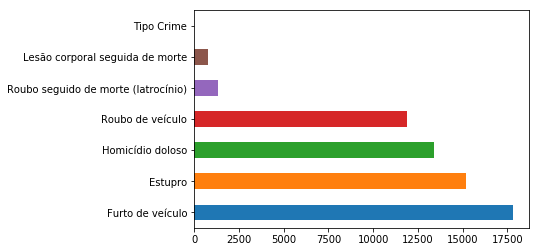

In [13]:
crimes = csv.crime.value_counts()
crimes.plot.barh()

In [139]:
crimes_por_mes = csv.groupby(['mes','crime']).agg('ocorrencias')
meses = crimes_por_mes.size()
janeiro = meses[:6]
fevereiro = meses[7:12]
marco = meses[13:18]
abril = meses[19:24]
maio = meses[25:30]
junho = meses[31:36]
julho = meses[37:42]
agosto = meses[43:48]
setembro = meses[49:54]
outubro = meses[55:60]
novembro = meses[61:66]
dezembro = meses[67:72]

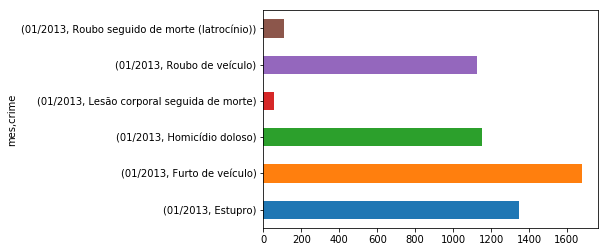

In [140]:
janeiro.plot(kind="barh")

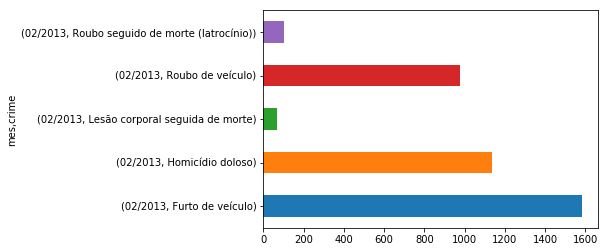

In [141]:
fevereiro.plot(kind="barh")

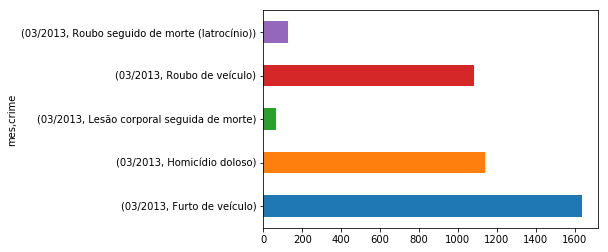

In [142]:
marco.plot(kind="barh")

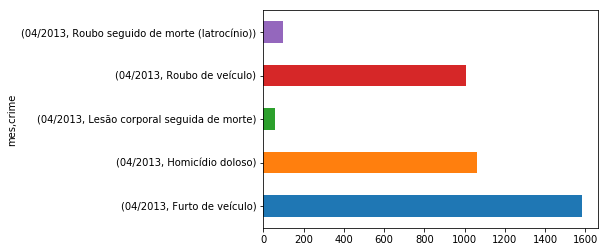

In [143]:
abril.plot(kind="barh")

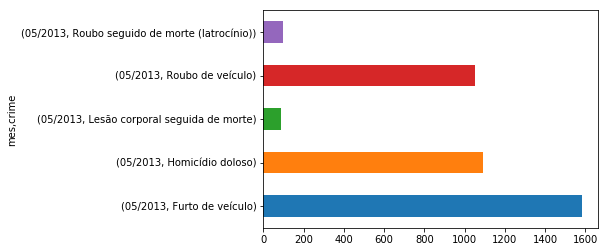

In [144]:
maio.plot(kind="barh")

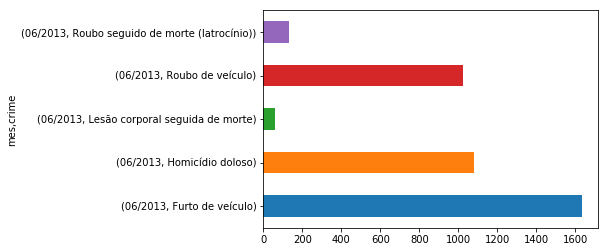

In [145]:
junho.plot(kind="barh")

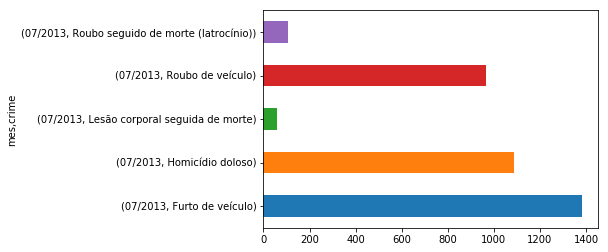

In [146]:
julho.plot(kind="barh")

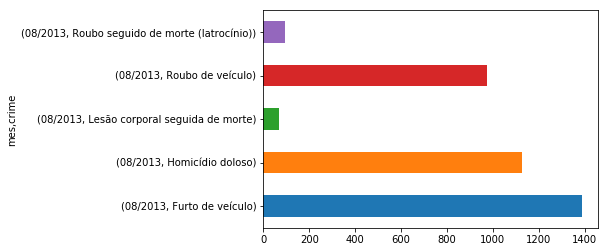

In [147]:
agosto.plot(kind="barh")

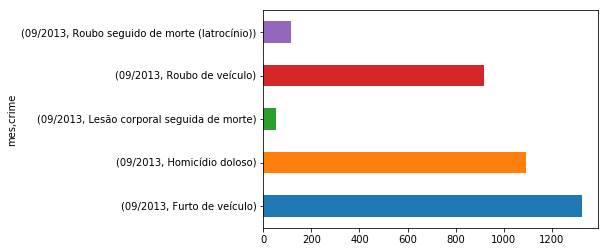

In [148]:
setembro.plot(kind="barh")

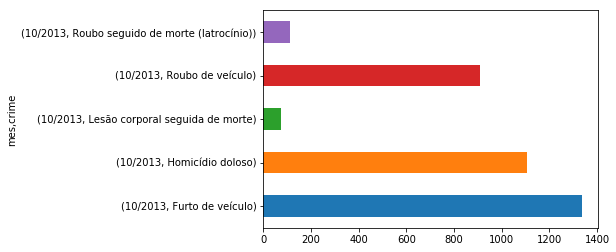

In [149]:
outubro.plot(kind="barh")

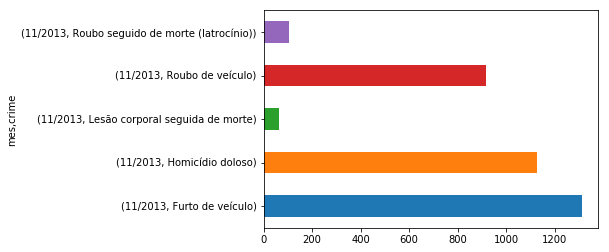

In [137]:
novembro.plot(kind="barh")

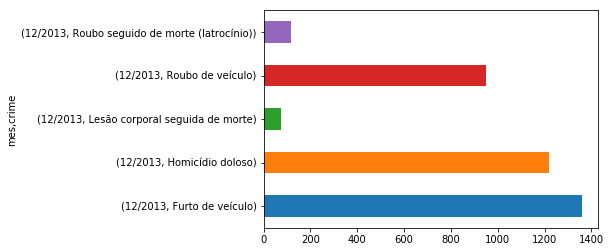

In [138]:
dezembro.plot(kind="barh")

In [33]:
crimes_por_municipio = csv.groupby(['municipio','crime']).agg('ocorrencias')
municipios = crimes_por_municipio.size()
municipios.idxmax()

('São Sebastião', 'Homicídio doloso')

In [20]:
municipios

municipio              crime                              
Abadia De Goiás        Homicídio doloso                       1
                       Roubo de veículo                       1
Abadia Dos Dourados    Furto de veículo                       1
Abadiânia              Estupro                                1
                       Furto de veículo                       2
                       Roubo de veículo                       3
Abaetetuba             Estupro                                8
                       Furto de veículo                       4
                       Homicídio doloso                       9
                       Roubo de veículo                       7
                       Roubo seguido de morte (latrocínio)    1
Abaeté                 Estupro                                1
                       Furto de veículo                       5
                       Homicídio doloso                       2
Abaré                  Estupro               

In [56]:
files = glob.glob('dados/*.csv')
years = []
for file in files:
    data = pd.read_csv(file, encoding='latin-1',sep=';',index_col=None)
    years.append(data)
years_data = pd.concat(years, ignore_index=True,sort=False)

In [49]:
years_data.columns=[
    "regiao",
    "uf",
    "estado",
    "codigo_IBGE",
    "municipio",
    "crime",
    "ano",
    "mes",
    "ocorrencias"
]

ValueError: Length mismatch: Expected axis has 22 elements, new values have 9 elements

In [57]:
years_data

,Registros de Boletins de Ocorrências por munícipio e mês - 2006.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Registros de Boletins de Ocorrências por munícipio e mês - 2004,...,Registros de Boletins de Ocorrências por munícipio e mês - 2012.,Registros de Boletins de Ocorrências por munícipio e mês - 2014,Registros de Boletins de Ocorrências por munícipio e mês - 2015,Registros de Boletins de Ocorrências por munícipio e mês - 2010.,Registros de Boletins de Ocorrências por munícipio e mês - 2016,Registros de Boletins de Ocorrências por munícipio e mês - 2005.,Registros de Boletins de Ocorrências por munícipio e mês - 2008.,Registros de Boletins de Ocorrências por munícipio e mês - 2011.,Registros de Boletins de Ocorrências por munícipio e mês - 2013,Registros de Boletins de Ocorrências por munícipio e mês - 1 semestre de 2017.
0,Fonte: SinespJC - Módulo Polícias Civis do Bra...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Nota 1: As informações apresentadas estão de a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Nota 2: Por motivo de compactação do arquivo, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Região,Sigla UF,UF,Código IBGE Município,Município,Tipo Crime,Mês,Mês/Ano,PC-Qtde Ocorrências,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,01,01/2006,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,02,02/2006,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,03,03/2006,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,04,04/2006,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,05,05/2006,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CENTRO-OESTE,DF,Distrito Federal,530010801,Brasília,Estupro,06,06/2006,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
